# Week 2 HW : Linear Basis Regression

In [1]:
import numpy as np; np.set_printoptions(precision=3)
import pandas as pd; pd.set_option('display.precision',3)
import matplotlib.pyplot as plt
import seaborn as sns

## 1. EDA 

In [2]:
real = pd.read_csv('real.csv', index_col=0)
real.columns = ['date','house_age','dist_mrt','no_cvs','lat','long','price']
real

,date,house_age,dist_mrt,no_cvs,lat,long,price
No,,,,,,,
1,2012.917,32.0,84.879,10,24.983,121.540,37.9
2,2012.917,19.5,306.595,9,24.980,121.540,42.2
3,2013.583,13.3,561.985,5,24.987,121.544,47.3
4,2013.500,13.3,561.985,5,24.987,121.544,54.8
5,2012.833,5.0,390.568,5,24.979,121.542,43.1
6,2012.667,7.1,2175.030,3,24.963,121.513,32.1
7,2012.667,34.5,623.473,7,24.979,121.536,40.3
8,2013.417,20.3,287.603,6,24.980,121.542,46.7
9,2013.500,31.7,5512.038,1,24.951,121.485,18.8


In [3]:
real.info() # Checking whether NA value exists

<class 'pandas.core.frame.DataFrame'>
Int64Index: 414 entries, 1 to 414
Data columns (total 7 columns):
date         414 non-null float64
house_age    414 non-null float64
dist_mrt     414 non-null float64
no_cvs       414 non-null int64
lat          414 non-null float64
long         414 non-null float64
price        414 non-null float64
dtypes: float64(6), int64(1)
memory usage: 25.9 KB


In [4]:
real.sort_values(by=['price'], inplace=True)
real.reset_index(inplace=True) 
real = real.drop(['No'], axis=1)
real

,date,house_age,dist_mrt,no_cvs,lat,long,price
0,2013.333,14.8,393.261,6,24.962,121.538,7.6
1,2013.583,17.4,6488.021,1,24.957,121.474,11.2
2,2012.750,16.0,4066.587,0,24.943,121.503,11.6
3,2013.000,30.9,6396.283,1,24.944,121.479,12.2
4,2013.083,32.0,1156.777,0,24.949,121.530,12.8
5,2013.000,16.5,4082.015,0,24.942,121.504,12.8
6,2012.750,16.1,4066.587,0,24.943,121.503,12.9
7,2013.000,13.6,4197.349,0,24.939,121.504,13.0
8,2012.667,29.4,4510.359,1,24.949,121.495,13.2
9,2013.417,24.2,4605.749,0,24.947,121.496,13.4


In [5]:
real.describe()

,date,house_age,dist_mrt,no_cvs,lat,long,price
count,414.000,414.000,414.000,414.000,414.000,414.000,414.000
mean,2013.149,17.713,1083.886,4.094,24.969,121.533,37.980
std,0.282,11.392,1262.110,2.946,0.012,0.015,13.606
min,2012.667,0.000,23.383,0.000,24.932,121.474,7.600
25%,2012.917,9.025,289.325,1.000,24.963,121.528,27.700
50%,2013.167,16.100,492.231,4.000,24.971,121.539,38.450
75%,2013.417,28.150,1454.279,6.000,24.977,121.543,46.600
max,2013.583,43.800,6488.021,10.000,25.015,121.566,117.500


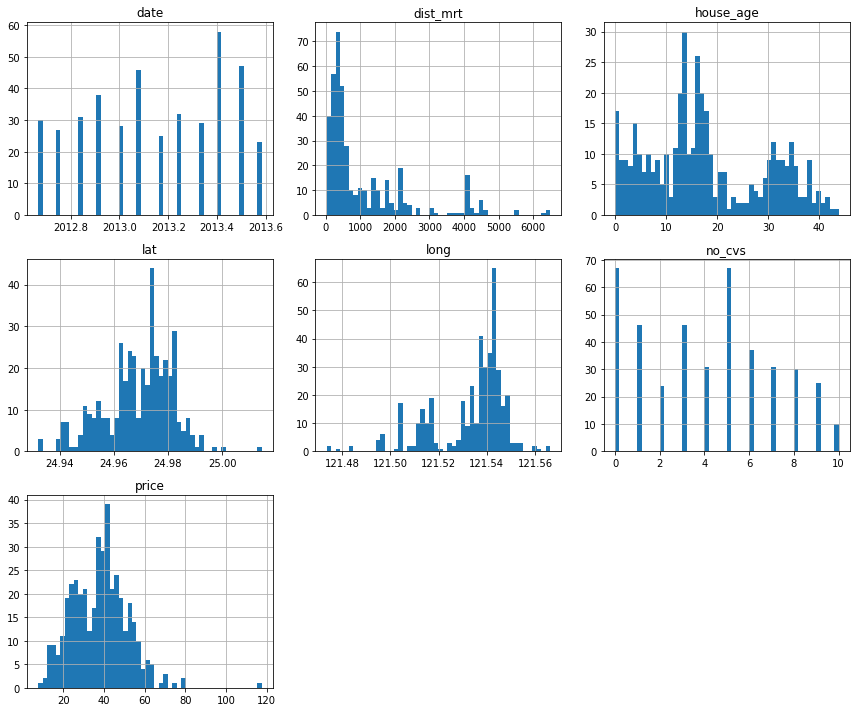

In [6]:
real.hist(bins=50, figsize=(12,10))
plt.tight_layout()

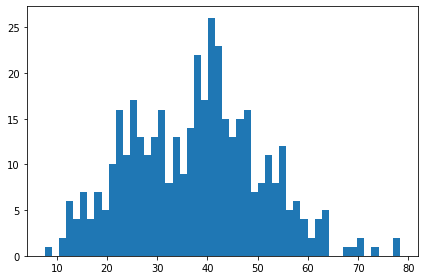

In [7]:
real = real[real.price < 80] # delete outlier of price
plt.hist(real.price, bins=50)
plt.tight_layout()

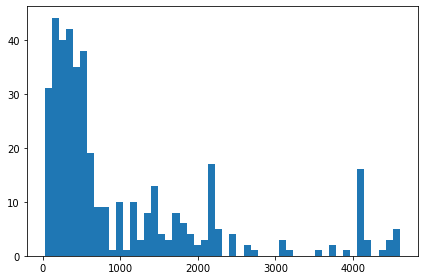

In [8]:
real = real[real.dist_mrt < 5000] # delete outlier of dist_mrt
plt.hist(real.dist_mrt, bins=50)
plt.tight_layout()

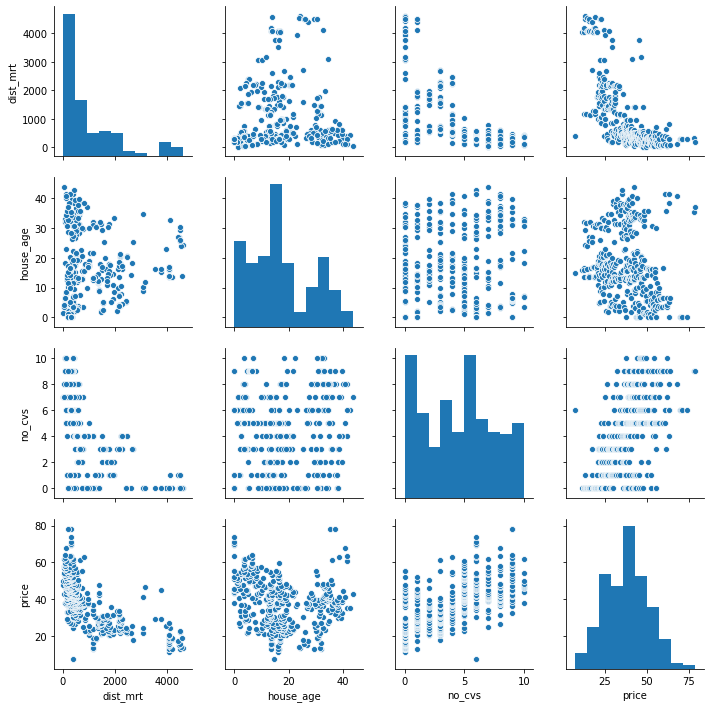

In [9]:
sns.pairplot(real[['dist_mrt', 'house_age','no_cvs','price']])

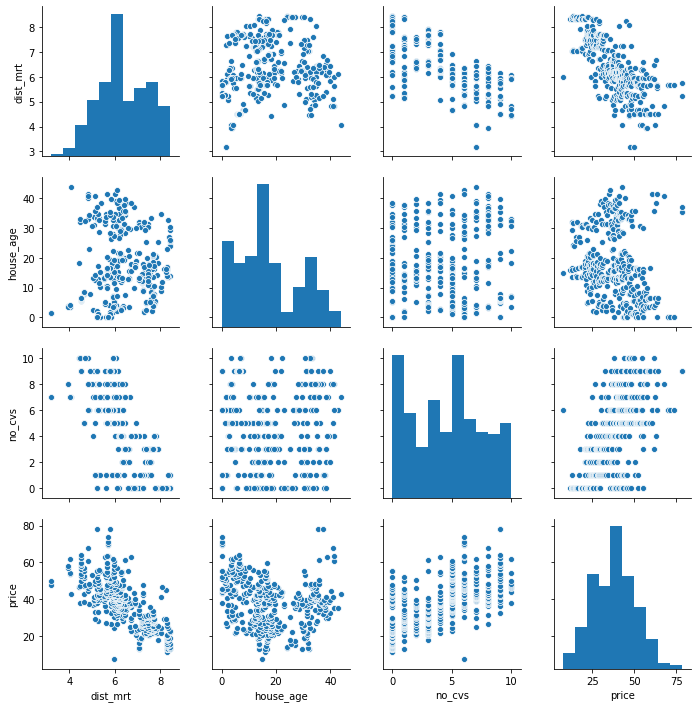

In [10]:
real2 = real.copy()
real2['dist_mrt'] = np.log(1+real.dist_mrt) # transform the data to avoid skewness
sns.pairplot(real2[['dist_mrt', 'house_age','no_cvs','price']])

## 2. Polynomial Regression

In [11]:
data = real2[['dist_mrt', 'house_age','no_cvs', 'price']]

In [12]:
# Splitting the data into Train - Test Sets

from sklearn.model_selection import train_test_split

X, Y = data.drop('price',axis=1), real2['price']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=415)

In [13]:
X_train.reset_index(drop=True, inplace=True)
Y_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
Y_test.reset_index(drop=True, inplace=True)

In [14]:
# Standard Scaling

from sklearn import preprocessing as pp
scaler = pp.StandardScaler().fit(X_train)

X_train_sc = pd.DataFrame(scaler.transform(X_train)) 
X_test_sc = pd.DataFrame(scaler.transform(X_test))
Y_train = pd.DataFrame(Y_train)
Y_test = pd.DataFrame(Y_test)
X_train_sc.set_axis(X_train.columns, axis=1, inplace=True)
X_test_sc.set_axis(X_test.columns, axis=1, inplace=True)

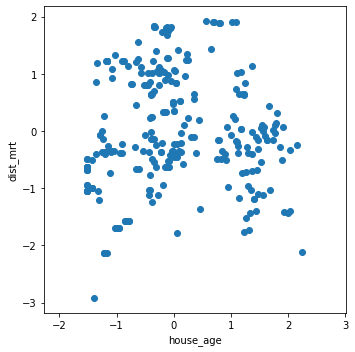

In [15]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(X_train_sc.house_age, X_train_sc.dist_mrt)
ax.set_xlabel('house_age')
ax.set_ylabel('dist_mrt')
ax.axis('equal')
fig.tight_layout()

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error as MSE

In [17]:
def Poly_Reg(X_train, Y_train, X_test, Y_test, m):
    
    poly = PolynomialFeatures(degree=m)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.fit_transform(X_test)

    lin = LinearRegression(fit_intercept=False)
    lin.fit(X_train_poly, Y_train)
    Y_train_pred = lin.predict(X_train_poly)
    Y_test_pred = lin.predict(X_test_poly)

    train_MSE = MSE(Y_train, Y_train_pred)
    test_MSE = MSE(Y_test, Y_test_pred)

    Resid = Y_train - Y_train_pred
    
    return {'coef':lin.coef_, 'train_MSE':train_MSE, 'test_MSE':test_MSE, 'Resid':Resid}

In [18]:
PRmodel = Poly_Reg(X_train_sc, Y_train, X_test_sc, Y_test, 2)
PRmodel['test_MSE']

57.99702778203174

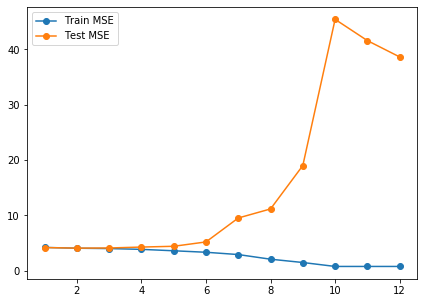

In [19]:
output = pd.DataFrame(columns=['d','Train MSE','Test MSE'])
for i in np.arange(12):
    m = i+1
    Reg = Poly_Reg(X_train_sc, Y_train, X_test_sc, Y_test, m)
    output.loc[i] = [m, Reg['train_MSE'], Reg['test_MSE']]
fig, ax = plt.subplots(figsize=(7,5))
ax.plot(output['d'], np.log(output['Train MSE']), 'o-', label='Train MSE')
ax.plot(output['d'], np.log(output['Test MSE']), 'o-', label='Test MSE')
ax.legend()

## 3. Ridge Regression

In [20]:
poly = PolynomialFeatures(degree=2)
Phi_train = poly.fit_transform(X_train_sc)
Phi_test = poly.fit_transform(X_test_sc)
print(Phi_train.shape)
print(Phi_test.shape)

(285, 10)
(123, 10)


In [21]:
from sklearn.linear_model import Ridge
alphas=np.logspace(-6, 6, 500)

In [22]:
def Ridge_Reg(Phi_train, Y_train, Phi_test, Y_test, alphas, fig=False):
    reg = Ridge()
    coefs = []
    train_MSE = []
    test_MSE = []
    
    for a in alphas:
        reg.set_params(alpha=a) 
        reg.fit(Phi_train, Y_train)
        coefs.append(reg.coef_)
    
        train_pred = reg.predict(Phi_train)
        train_MSE.append(MSE(Y_train, train_pred))
    
        test_pred = reg.predict(Phi_test)
        test_MSE.append(MSE(Y_test, test_pred))
    
    if fig==True:
        fig = plt.figure(figsize=(14,6))

        ax1 = fig.add_subplot(121)
        labels = ['X%d'%i for i in range(Phi_train.shape[1])]
        for i in range(Phi_train.shape[1]):
            ax1.plot(alphas, np.array(coefs)[:,:,i], label=labels[i])
        ax1.set_xscale('log')
        ax1.axvline(x=alphas[np.argmin(test_MSE)], linestyle='--', color='grey')
        ax1.legend()

        ax2 = fig.add_subplot(122)
        ax2.plot(alphas, train_MSE, label='Train MSE')
        ax2.plot(alphas, test_MSE, label='Test MSE')
        ax2.set_xscale('log')
        ax2.axvline(x=alphas[np.argmin(test_MSE)], linestyle='--', color='grey')
        alpha = np.around(alphas[np.argmin(test_MSE)],3)
        ax2.text(alphas[np.argmin(test_MSE)], np.amin(test_MSE), 'alpha={0}'.format(alpha), size=15)
        ax2.legend()

        print("Weight:" ,coefs[np.argmin(test_MSE)])
        
    return {'coefs': coefs, 'train_MSE': train_MSE, 'test_MSE': test_MSE}

Weight: [[ 0.    -6.298 -3.667  2.937 -1.768  0.28  -0.657  2.242  0.232 -0.688]]


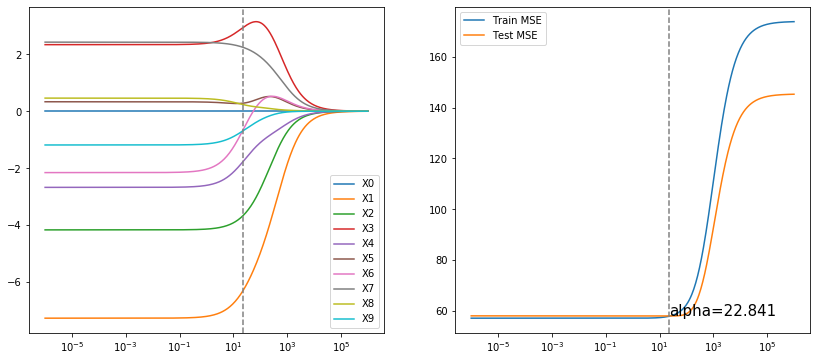

In [23]:
Ridge_output = Ridge_Reg(Phi_train, Y_train, Phi_test, Y_test, alphas, fig=True)

## 4. Lasso Regression

In [24]:
from sklearn.linear_model import Lasso

In [25]:
def Lasso_Reg(Phi_train, Y_train, Phi_test, Y_test, alphas, fig=False):
    reg = Lasso()
    coefs=[]
    train_MSE=[]
    test_MSE = []
    for a in alphas:
        reg.set_params(alpha=a)
        reg.fit(Phi_train,Y_train)
        coefs.append(reg.coef_)
        
        train_pred=(reg.predict(Phi_train))
        train_MSE.append(MSE(Y_train, train_pred))
        
        test_pred=(reg.predict(Phi_test))
        test_MSE.append(MSE(Y_test,test_pred))

    if fig==True:
        fig = plt.figure(figsize=(14,6))

        ax1 = fig.add_subplot(121)
        labels = ['X%d'%i for i in range(Phi_train.shape[1])]
        for i in range(Phi_train.shape[1]):
            ax1.plot(alphas, np.array(coefs)[:,i], label=labels[i])
        ax1.set_xscale('log')
        ax1.axvline(x=alphas[np.argmin(test_MSE)], linestyle='--', color='grey')
        ax1.legend()

        ax2 = fig.add_subplot(122)
        ax2.plot(alphas, train_MSE, label='Train MSE')
        ax2.plot(alphas, test_MSE, label='Test MSE')
        ax2.set_xscale('log')
        ax2.axvline(x=alphas[np.argmin(test_MSE)], linestyle='--', color='grey')
        alpha = np.around(alphas[np.argmin(test_MSE)],3)
        ax2.text(alphas[np.argmin(test_MSE)], np.amin(test_MSE), 'alpha={0}'.format(alpha), size=15)
        ax2.legend()

        print("Weight:" ,coefs[np.argmin(test_MSE)])
        
    return {'coefs': coefs, 'train_MSE': train_MSE, 'test_MSE': test_MSE}

Weight: [ 0.    -6.849 -2.704  2.184 -1.019  0.     0.     1.304 -0.    -0.   ]


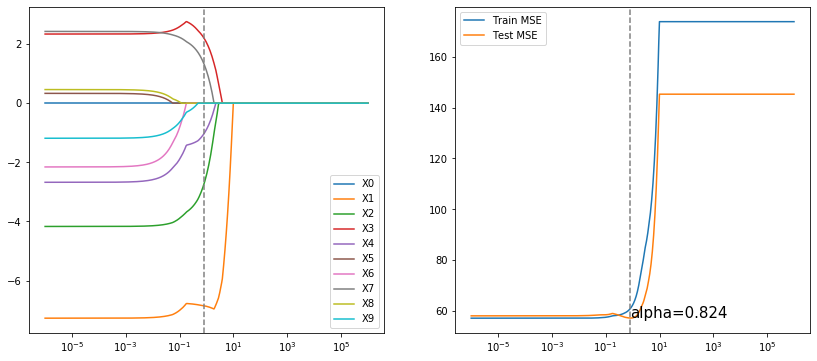

In [26]:
Lasso_output=Lasso_Reg(Phi_train,Y_train,Phi_test,Y_test,alphas, fig=True)

## 5. K-Fold Cross Validation

In [27]:
from sklearn.model_selection import KFold

In [28]:
kcv = KFold(n_splits=5, shuffle=True)
kcv 

KFold(n_splits=5, random_state=None, shuffle=True)

In [29]:
kcvMSE_Ridge = np.zeros((kcv.get_n_splits(), alphas.size))
kcvMSE_Lasso = np.zeros((kcv.get_n_splits(), alphas.size))

In [30]:
i = 0
for train_index, test_index in kcv.split(Phi_train, Y_train):
    print("TRAIN:", train_index, "TEST:", test_index)
    CV_Phi_train, CV_Phi_test = Phi_train[train_index,:], Phi_train[test_index,:]
    CV_Y_train, CV_Y_test = Y_train.iloc[train_index,:], Y_train.iloc[test_index,:]
    
    Ridge_output = Ridge_Reg(CV_Phi_train, CV_Y_train, CV_Phi_test, CV_Y_test, alphas, fig=False)
    kcvMSE_Ridge[i, :] = Ridge_output['test_MSE']
    
    Lasso_output = Lasso_Reg(CV_Phi_train, CV_Y_train, CV_Phi_test, CV_Y_test, alphas, fig=False)
    kcvMSE_Lasso[i, :] = Lasso_output['test_MSE']
    i += 1

TRAIN: [  0   1   3   4   5   6   8   9  10  12  13  14  16  17  18  20  21  23
  25  26  27  29  31  32  33  34  35  36  37  38  40  41  42  43  44  45
  46  48  49  50  52  53  55  56  58  59  60  61  62  64  65  66  67  68
  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86
  87  88  89  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105
 106 107 108 109 111 112 113 115 116 117 118 119 121 123 124 125 126 130
 131 133 135 136 137 138 141 143 144 145 146 147 148 151 152 153 155 156
 158 160 162 163 164 167 168 169 170 171 172 173 176 177 178 179 180 181
 183 184 185 187 188 190 192 193 194 195 196 198 199 200 201 202 203 204
 205 207 208 209 210 211 213 214 215 216 217 218 219 220 221 222 224 227
 228 230 231 232 233 234 235 238 240 241 242 243 244 245 247 248 249 250
 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268
 269 270 272 273 274 275 276 277 278 280 283 284] TEST: [  2   7  11  15  19  22  24  28  30  39  47  51  54  57  63 

Weight: [[ 0.    -6.399 -3.821  2.912 -2.221  0.676 -2.049  2.506  0.818 -1.604]]


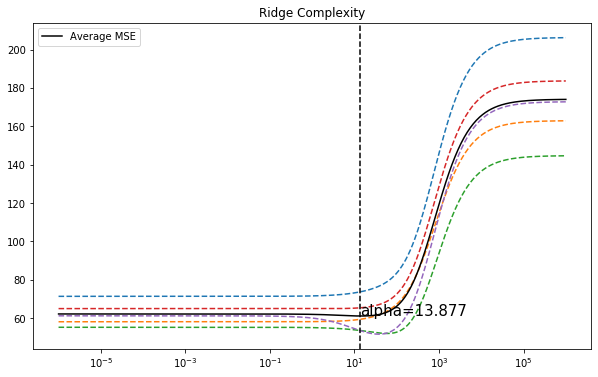

In [31]:
fig, ax= plt.subplots(figsize=(10,6))
meanMSE = np.apply_along_axis(np.mean, 1, kcvMSE_Ridge.T)
ax.plot(alphas, kcvMSE_Ridge.T, linestyle='--')
ax.plot(alphas, meanMSE, color='black', label='Average MSE')
ax.set_xscale('log')
ax.axvline(x=alphas[np.argmin(meanMSE)], linestyle='--', color='black')
alpha = np.around(alphas[np.argmin(meanMSE)],3)
ax.text(alphas[np.argmin(meanMSE)], np.amin(meanMSE), 'alpha={0}'.format(alpha), size=15)
ax.set_title('Ridge Complexity')
ax.legend()

coefs = Ridge_output['coefs']
print("Weight:" ,coefs[np.argmin(meanMSE)])

Weight: [ 0.    -6.599 -3.488  2.929 -1.101 -0.    -0.008  2.166  0.    -0.571]


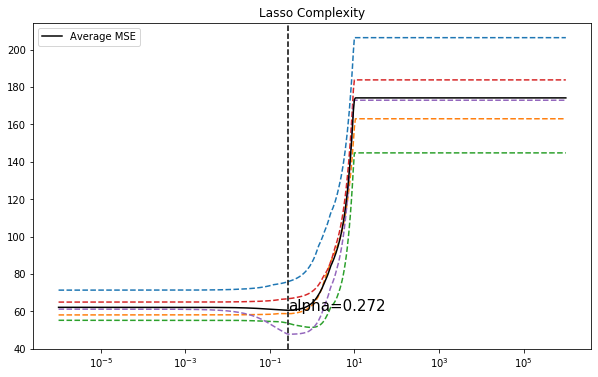

In [32]:
fig, ax= plt.subplots(figsize=(10,6))
meanMSE = np.apply_along_axis(np.mean, 1, kcvMSE_Lasso.T)
ax.plot(alphas, kcvMSE_Lasso.T, linestyle='--')
ax.plot(alphas, meanMSE, color='black', label='Average MSE')
ax.set_xscale('log')
ax.axvline(x=alphas[np.argmin(meanMSE)], linestyle='--', color='black')
alpha = np.around(alphas[np.argmin(meanMSE)],3)
ax.text(alphas[np.argmin(meanMSE)], np.amin(meanMSE), 'alpha={0}'.format(alpha), size=15)
ax.set_title('Lasso Complexity')
ax.legend()

coefs = Lasso_output['coefs']
print("Weight:" ,coefs[np.argmin(meanMSE)])

In [33]:
Ridge_alphas = [alphas[np.argmin(meanMSE)]]
Lasso_alphas = [alphas[np.argmin(meanMSE)]]

In [34]:
PRmodel['test_MSE']

57.99702778203174

In [35]:
Ridge_output = Ridge_Reg(Phi_train, Y_train, Phi_test, Y_test, Ridge_alphas)
print(Ridge_output['coefs'], Ridge_output['test_MSE'],)

[array([[ 0.   , -7.25 , -4.16 ,  2.349, -2.655,  0.327, -2.123,  2.421,
         0.453, -1.176]])] [57.99397142557452]


In [36]:
Lasso_output = Lasso_Reg(Phi_train, Y_train, Phi_test, Y_test, Lasso_alphas)
print(Lasso_output['coefs'], Lasso_output['test_MSE'],)

[array([ 0.   , -6.784, -3.546,  2.664, -1.375, -0.   , -0.   ,  1.965,
        0.   , -0.213])] [58.438981896345716]


MSE는 Ridge에서 최소화되는 것을 볼 수 있기 때문에 Ridge 모형을 선택해야 한다. 이런 결과가 나오는 이유는 위의 corrplot에서 각 변수들 간 상관관계가 있는 것으로 나타나기 때문이라고 생각한다. 이로 인해 3개의 변수를 collapse시킨 Lasso는 MSE가 가장 크게 나타나고, Polynomia과 Ridge가 엇비슷하게 나타나고 있다. 하지만 이 정도 차이밖에 나지 않는다면 test set에 따라 두 모형의 MSE 대소가 뒤바뀔 수도 있을 것으로 예상된다.